**Denoise using Filter**

Gaussian Blur, Median Blur v√† Bilateral Filter l√† c√°c ph∆∞∆°ng ph√°p gi·∫£m nhi·ªÖu d·ª±a v√†o l√¢n c·∫≠n. T·ª©c l√†, ch√∫ng ta s·ª≠ d·ª•ng m·ªôt nh√≥m c√°c l√¢n c·∫≠n c·ªßa pixel, th·ª±c hi·ªán c√°c t√≠nh to√°n v√† ƒë∆∞a ra gi√° tr·ªã m·ªõi cho pixel ƒë√≥.

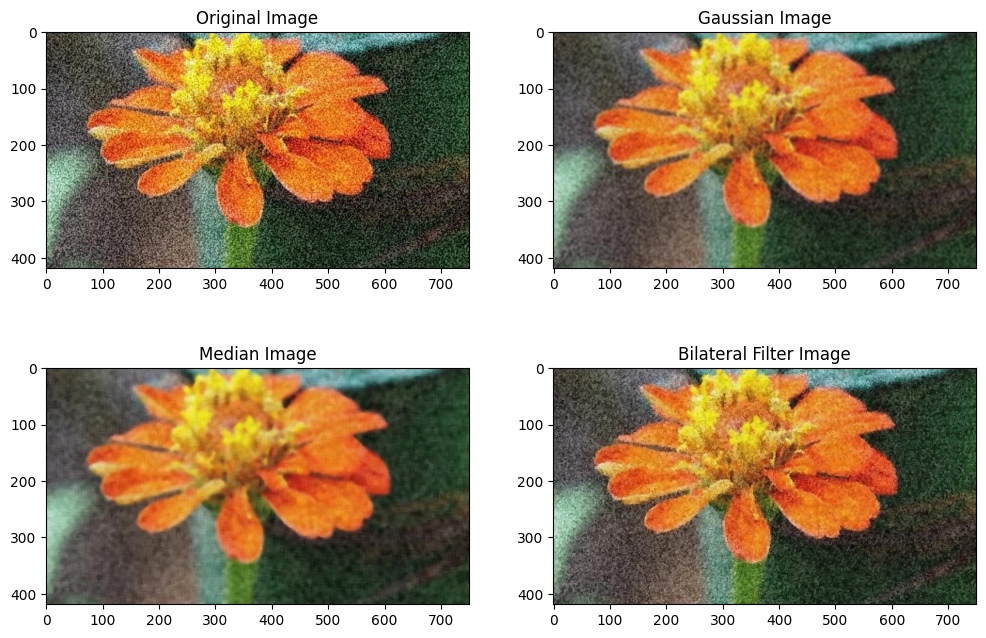

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('noise.jpg')

gaussian_blur = cv2.GaussianBlur(src=image, ksize=(9,9), sigmaX=0, sigmaY=0)
median_blur = cv2.medianBlur(src=image, ksize=9)
bilateral_filter = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=[12,8])
plt.subplot(221); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(222); plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)); plt.title("Gaussian Image")
plt.subplot(223); plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)); plt.title("Median Image")
plt.subplot(224); plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB)); plt.title("Bilateral Filter Image")
plt.show()

**Non-Local Means Denoising**

C√≥ m·ªôt ƒë·∫∑c t√≠nh c·ªßa nhi·ªÖu ƒë√≥ l√† nhi·ªÖu c√≥ gi√° tr·ªã trung b√¨nh b·∫±ng 0. D·∫´n ƒë·∫øn m·ªôt √Ω t∆∞·ªüng gi·∫£m nhi·ªÖu ƒë√≥ l√† s·ª≠ d·ª•ng m·ªôt t·∫≠p h√¨nh ·∫£nh t∆∞∆°ng t·ª± ƒë·ªÉ t√≠nh gi√° tr·ªã trung b√¨nh c·ªßa t·∫≠p h√¨nh ·∫£nh ƒë√≥, theo nh∆∞ ƒë·∫∑c t√≠nh tr√™n th√¨ nhi·ªÖu s·∫Ω v·ªÅ 0.

ƒê∆°n gi·∫£n h∆°n, thay v√¨ s·ª≠ d·ª•ng nh√≥m ·∫£nh t∆∞∆°ng t·ª± th√¨ c√≥ th·ªÉ d√πng m·ªôt ·∫£nh d·ª±a tr√™n √Ω t∆∞·ªüng r·∫±ng c√°c ƒëi·ªÉm ·∫£nh trong m·ªôt ·∫£nh t·ª± nhi√™n c√≥ m·ªëi quan h·ªá v·ªõi c√°c ƒëi·ªÉm ·∫£nh kh√°c kh√¥ng ch·ªâ ·ªü g·∫ßn nhau m√† c√≤n ·ªü xa nhau. Ph∆∞∆°ng ph√°p n√†y g·ªçi l√† ph∆∞∆°ng ph√°p kh·ª≠ nhi·ªÖu trung b√¨nh phi c·ª•c b·ªô (Non-Local Means Denoising).

C√°ch th·ª©c ho·∫°t ƒë·ªông c·ªßa Non-Local Means Denoising ƒë·ªÉ x√°c ƒë·ªãnh gi√° tr·ªã m·ªõi v'(i) cho ƒëi·ªÉm ·∫£nh i (c√≥ gi√° tr·ªã v(i)):

--> Th·ª© nh·∫•t, ch√∫ng ta c√≥ hai tham s·ªë templateWindowSize v√† searchWindowSize trong ƒë√≥ templateWindowSize s·∫Ω l√† k√≠ch th∆∞·ªõc c·ªßa s·ªï m·∫´u (v√≠ d·ª• size 7x7 th√¨ s·∫Ω s·ª≠ d·ª•ng m·ªôt m·∫´u 7x7 l·∫•y ƒëi·ªÉm i l√†m trung t√¢m v√† t√≠nh t∆∞∆°ng ƒë·ªìng v·ªõi c√°c v√πng c√≥ k√≠ch th∆∞·ªõc 7x7 kh√°c l·∫•y ƒëi·ªÉm j l√†m trung t√¢m), searchWindowSize s·∫Ω l√† k√≠ch th∆∞·ªõc c·ªßa c·ª≠a s·ªë d√πng ƒë·ªÉ l·∫•y c√°c ƒëi·ªÉm ·∫£nh j v√† t√≠nh to√°n t∆∞∆°ng quan (v√≠ d·ª• size 21x21 th√¨ v·ªõi m·ªói ƒëi·ªÉm ·∫£nh j trong c·ª≠a s·ªï l·ªõn, m·ªôt patch centered t·∫°i j s·∫Ω ƒë∆∞·ª£c so s√°nh v·ªõi patch centered t·∫°i i.

--> Th·ª© hai, s·ª± t∆∞∆°ng ƒë·ªìng gi·ªØa c√°c patch ƒë∆∞·ª£c t√≠nh to√°n b·∫±ng c√°ch s·ª≠ d·ª•ng kho·∫£ng c√°ch Euclidean gi·ªØa hai patch, sau ƒë√≥ √°p d·ª•ng m·ªôt h√†m Gaussian ƒë·ªÉ c√≥ tr·ªçng s·ªë t∆∞∆°ng ƒë·ªìng. C√¥ng th·ª©c t√≠nh tr·ªçng s·ªë cho c√°c Patch(j) nh∆∞ sau: 
 
 

Trong ƒë√≥:

- ‚à•Pi‚Äã ‚àí Pj‚à•^2 l√† kho·∫£ng c√°ch Euclidean gi·ªØa hai patches.
- h l√† l√† tham s·ªë ƒëi·ªÅu khi·ªÉn m·ª©c ƒë·ªô smoothing. Gi√° tr·ªã h cao h∆°n s·∫Ω lo·∫°i b·ªè nhi·ªÖu t·ªët h∆°n nh∆∞ng c≈©ng lo·∫°i b·ªè c√°c chi ti·∫øt c·ªßa h√¨nh ·∫£nh. (n√™n ch·ªçn l√† 10)
- Z(i) l√† h·∫±ng s·ªë ƒë·ªÉ chu·∫©n h√≥a tr·ªçng s·ªë sao cho t·ªïng c√°c tr·ªçng s·ªë b·∫±ng 1.

--> Th·ª© ba, T√≠nh gi√° tr·ªã m·ªõi cho ƒëi·ªÉm ·∫£nh: Gi√° tr·ªã m·ªõi cho ƒëi·ªÉm ·∫£nh ùëñ ƒë∆∞·ª£c t√≠nh b·∫±ng trung b√¨nh c√≥ tr·ªçng s·ªë c·ªßa c√°c gi√° tr·ªã pixel trong c·ª≠a s·ªï l·ªõn, v·ªõi tr·ªçng s·ªë d·ª±a tr√™n s·ª± t∆∞∆°ng ƒë·ªìng c·ªßa c√°c patch: 

OpenCV cung c·∫•p b·ªën bi·∫øn th·ªÉ c·ªßa k·ªπ thu·∫≠t n√†y.

- cv.fastNlMeansDenoising() - ho·∫°t ƒë·ªông v·ªõi m·ªôt h√¨nh ·∫£nh thang ƒë·ªô x√°m
- cv.fastNlMeansDenoisingColored() - ho·∫°t ƒë·ªông v·ªõi h√¨nh ·∫£nh m√†u.
- cv.fastNlMeansDenoisingMulti() - ho·∫°t ƒë·ªông v·ªõi chu·ªói h√¨nh ·∫£nh ƒë∆∞·ª£c ch·ª•p trong kho·∫£ng th·ªùi gian ng·∫Øn (h√¨nh ·∫£nh thang ƒë·ªô x√°m)
- cv.fastNlMeansDenoisingColoredMulti() - t∆∞∆°ng t·ª± nh∆∞ tr√™n, nh∆∞ng d√†nh cho h√¨nh ·∫£nh m√†u.

M·ªôt s·ªë tham s·ªë:

- h : tham s·ªë quy·∫øt ƒë·ªãnh c∆∞·ªùng ƒë·ªô l·ªçc. Gi√° tr·ªã h cao h∆°n s·∫Ω lo·∫°i b·ªè nhi·ªÖu t·ªët h∆°n nh∆∞ng c≈©ng lo·∫°i b·ªè c√°c chi ti·∫øt c·ªßa h√¨nh ·∫£nh. (n√™n l√† 10)
- hForColorComponents : gi·ªëng nh∆∞ h, nh∆∞ng ch·ªâ d√†nh cho ·∫£nh m√†u.
- templateWindowSize : ph·∫£i l√† s·ªë l·∫ª. (n√™n l√† 7)
- searchWindowSize : ph·∫£i l√† s·ªë l·∫ª. (n√™n l√† 21)

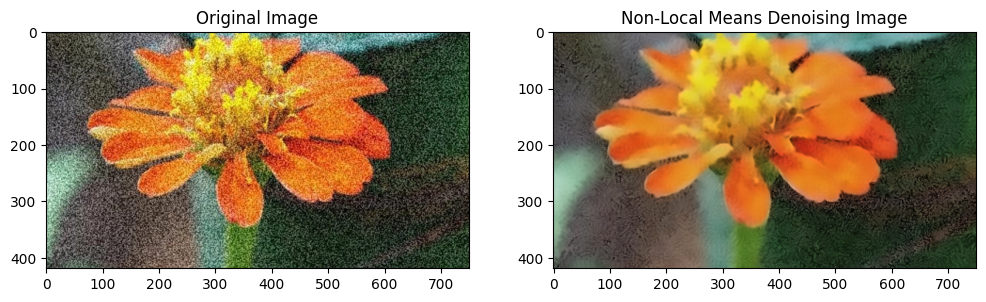

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('noise.jpg')

# cv2.fastNlMeansDenoisingColored(img_src, img_dst, h, hForColorComponents, templateWindowSize, searchWindowSize)
nlmd_image = cv2.fastNlMeansDenoisingColored(image, None, 20, 20, 7, 21)

plt.figure(figsize=[12,6])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(nlmd_image, cv2.COLOR_BGR2RGB)); plt.title("Non-Local Means Denoising Image")
plt.show()